# model prediction bioactivity of molecules of acetylcholine esterase inhibitors
* using pre_processed dataset from chEMBL database
* predicts bioactivity based on the target PIC50

## import libraries


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:

df = pd.read_csv('C:/Users/Halal - Store/Downloads/acetylcholinesteras.csv')

df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


## input  features 

In [6]:
x=df.drop('pIC50', axis=1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## input feature

In [7]:
y = df.pIC50
y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

# preparing data

In [8]:
x.shape

(4695, 881)

In [9]:
y.shape

(4695,)

## Remove low variance features


In [11]:

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = sel.fit_transform(x)

In [12]:
x.shape


(4695, 137)

## Data split 

In [14]:
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2)

In [15]:
x_trn.shape, y_trn.shape ,x_tst.shape , y_tst.shape

((3756, 137), (3756,), (939, 137), (939,))

#  Regression Model using Random Forest

In [16]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_trn, y_trn)
r2 = model.score(x_tst, y_tst)
r2

0.488930420794797

# visualization model

In [21]:
y_pred = model.predict(x_tst)

<function matplotlib.pyplot.show(close=None, block=None)>

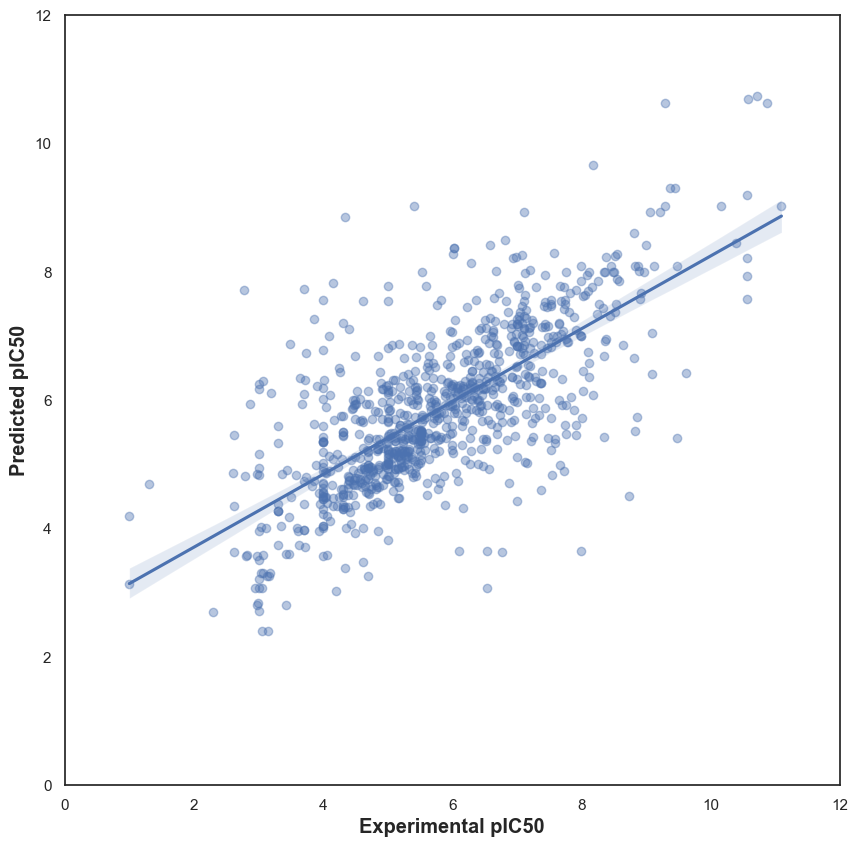

In [23]:

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_tst, y=y_pred, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(10, 10)
plt.show


# Compare ML algorithms using lazyprdict

In [24]:
! pip install lazypredict

  Obtaining dependency information for lazypredict from https://files.pythonhosted.org/packages/bb/df/936639581c018ac59b1096d34e42d39e967d97bf09b1fdb1645e64852e36/lazypredict-0.2.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 2.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.3 MB 2.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.3 MB 2.5 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.3 MB 1.6 MB/s eta 0:00:01
   

   --------- ------------------------------ 22.7/99.8 MB 2.6 MB/s eta 0:00:30
   --------- ------------------------------ 22.8/99.8 MB 2.6 MB/s eta 0:00:30
   --------- ------------------------------ 22.9/99.8 MB 2.6 MB/s eta 0:00:30
   --------- ------------------------------ 23.1/99.8 MB 2.6 MB/s eta 0:00:30
   --------- ------------------------------ 23.3/99.8 MB 2.6 MB/s eta 0:00:30
   --------- ------------------------------ 23.5/99.8 MB 2.9 MB/s eta 0:00:26
   --------- ------------------------------ 23.7/99.8 MB 2.9 MB/s eta 0:00:27
   --------- ------------------------------ 23.7/99.8 MB 2.9 MB/s eta 0:00:27
   --------- ------------------------------ 23.8/99.8 MB 2.8 MB/s eta 0:00:27
   --------- ------------------------------ 24.0/99.8 MB 2.8 MB/s eta 0:00:27
   --------- ------------------------------ 24.0/99.8 MB 2.8 MB/s eta 0:00:28
   --------- ------------------------------ 24.2/99.8 MB 2.8 MB/s eta 0:00:28
   --------- ------------------------------ 24.3/99.8 MB 2.8 MB/

In [25]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [30]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,pred_train = clf.fit(x_trn, x_trn, y_trn, y_trn)

 98%|█████████▊| 41/42 [02:04<00:01,  1.94s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.832150


100%|██████████| 42/42 [02:04<00:00,  2.97s/it]


In [31]:
pred_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.86,0.87,0.57,21.78
DecisionTreeRegressor,0.86,0.87,0.57,0.43
ExtraTreeRegressor,0.86,0.87,0.57,0.40
GaussianProcessRegressor,0.86,0.87,0.57,12.61
RandomForestRegressor,0.83,0.84,0.63,24.34
XGBRegressor,0.83,0.83,0.64,0.82
BaggingRegressor,0.81,0.82,0.66,2.10
MLPRegressor,0.78,0.78,0.72,7.55
HistGradientBoostingRegressor,0.69,0.70,0.86,4.50
